In [67]:
import yfinance as yf

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import annotations

In [69]:
stock_data = yf.Ticker("MINDTREE.NS")
stock_data = stock_data.history(period = '1y')[['Open']]
MINDT = stock_data.reset_index(drop = True)

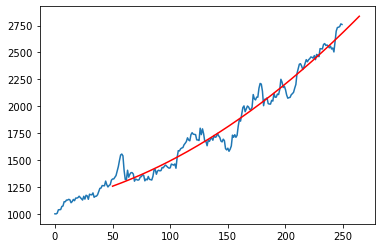

In [70]:
x = MINDT.index
y= MINDT.Open
model = np.polyfit(x,y,2)
predict = np.poly1d(model)
x_pol_reg = range(50, 265)
y_pol_reg = predict(x_pol_reg)
plt.plot(x,y)
plt.plot(x_pol_reg, y_pol_reg, c='r')


import yfinance as yf
import pandas as pd
tesla = yf.Ticker('TSLA')
tesla = tesla.history(period="max")
tesla = tesla[['Open']]
nio = yf.Ticker('NIO')
nio = nio.history(period="max")
nio = nio[['Open']]
stonks = tesla.merge(nio, how = 'outer', left_index = True, right_index = True)
stonks.columns = ['TSLA', 'NIO']
stonks

tesla = yf.Ticker('TSLA')

#### MY COLLUMMNS FOR STUDY

tesla = yf.Ticker('TSLA')
tesla=tesla.history(period="max")
tesla = tesla[['Open','Close','Volume']]
tesla

### CHOOSING STOCK LIST

In [73]:
stock_list = ['TSLA','NIO','IQQH.F','BTC-USD','BTC-INR',
              'ETH-USD','LTC-USD','AMZN','TWTR','FB','SQ','PYPL','BRK-A','CSPX.AS','GC=F','SI=F','CL=F','UA','IT','INR=X',
              'EURINR=X','^CNXIT','HAPPSTMNDS.NS','MPHASIS.NS','WIPRO.NS','MINDTREE.NS','INFY.NS','COFORGE.NS','HCLTECH.NS',
              'TCS.NS','TECHM.NS','^CNXAUTO','ASHOKLEY.NS','BOSCHLTD.NS','MARUTI.NS','TATAMOTORS.NS','ESCORTS.NS','BAJAJ-AUTO.NS',
              'EXIDEIND.NS','AMARAJABAT.NS','BALKRISIND.NS','MRF.NS','^CNXMETAL','NATIONALUM.NS','NMDC.NS','COALINDIA.NS',
              'VEDL.NS','TATASTEEL.NS','JINDALSTEL.NS','TATASTEEL.NS','JSWSTEEL.NS','SAIL.NS']

###### HALF DONE LIST 

In [74]:
stock_names = ['TESLA','NIO','CLEAN_ENERGE_ETF','BIT_COIN','BIT_IND','ETH_USD','LTC_USD','AMAZON','TWITTER','FACEBOOK',
              'SQUARE','PAYPAL','BERKSHR','S&P500','GOLD','SILV','CRUDE','UARMOR','GARTNER','USD_N_RS','EUROINR',
               'NIFTY_IT','HAPPYMIND','MPHASIS','WIPRO','MINDTREE','INFY','COFORGE']

######### basic practice

In [ ]:
i=1
index_dot = stock_list[i].find(".")
stock_list[i],index_dot

In [ ]:
index_dot = stock_list[i].find(".")
name = stock_list[i][:index_dot]
name


In [75]:
len(stock_names), len(stock_list)

(28, 52)

### DEFINE A COLLECTION AND CLEANING

In [76]:
def collect_clean(lists: list[str]) :
    res=[]
    for stock in lists:
        idx=stock.find(".")
        if idx == -1:
            res.append(stock)
        else:
            res.append(stock[:idx])
    return res
        
       

In [77]:
temp_list = collect_clean(stock_list[len(stock_names):])

In [78]:
stock_names = stock_names+temp_list

In [79]:
len(stock_names), len(stock_list)

(52, 52)

In [80]:
stock_dict = {i:j for i,j in zip(stock_names,stock_list)}

stock_dict

stock_dict.items()

### append to a new DataFrame

In [81]:
master_df = pd.DataFrame()
for key,val in stock_dict.items():
    df = yf.Ticker(val)
    df=df.history(period="max")
    df.dropna(inplace=True)
    #df = df[['Open','Close','Volume']]
    master_df[key+'_Open'] = df['Open']
    master_df[key+'_Close'] = df['Close']
    master_df[key+'_Volume'] = df['Volume']
    #print(f"{key} is done")

- ^CNXAUTO: 1d data not available for startTime=-2208988800 and endTime=1627139574. Only 100 years worth of day granularity data are allowed to be fetched per request.
- ^CNXMETAL: 1d data not available for startTime=-2208988800 and endTime=1627139580. Only 100 years worth of day granularity data are allowed to be fetched per request.


#### quality check

In [ ]:
df[df.index.duplicated()]

In [82]:
master_df.head()

,TESLA_Open,TESLA_Close,TESLA_Volume,NIO_Open,NIO_Close,NIO_Volume,CLEAN_ENERGE_ETF_Open,CLEAN_ENERGE_ETF_Close,CLEAN_ENERGE_ETF_Volume,BIT_COIN_Open,...,TATASTEEL_Volume,JINDALSTEL_Open,JINDALSTEL_Close,JINDALSTEL_Volume,JSWSTEEL_Open,JSWSTEEL_Close,JSWSTEEL_Volume,SAIL_Open,SAIL_Close,SAIL_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-29,3.800,4.778,93831500,NaN,NaN,NaN,7.12,6.98,140.0,NaN,...,7145250.0,627.561829,611.180420,2331134.0,89.569516,88.419571,16762130.0,166.466334,162.506851,18772835.0
2010-06-30,5.158,4.766,85935500,NaN,NaN,NaN,6.91,6.90,0.0,NaN,...,6243760.0,611.967509,614.427185,1747926.0,87.615024,89.422081,9869710.0,160.063776,162.338364,15343205.0
2010-07-01,5.000,4.392,41094000,NaN,NaN,NaN,6.81,6.66,0.0,NaN,...,5215330.0,602.128869,603.604675,1372753.0,88.849206,87.353859,8914290.0,160.906202,159.431931,12752080.0
2010-07-02,4.600,3.840,25699000,NaN,NaN,NaN,6.79,6.88,0.0,NaN,...,5640185.0,603.604690,605.277283,1067460.0,87.615025,86.751511,11366730.0,159.474050,160.105881,11771240.0
2010-07-06,4.000,3.222,34334500,NaN,NaN,NaN,7.04,7.12,0.0,NaN,...,5562172.0,604.096536,619.936829,2150716.0,86.772589,90.639442,16662070.0,160.358602,163.180771,10611970.0


### correlation plotting  on seaborn

In [83]:
import seaborn as sns

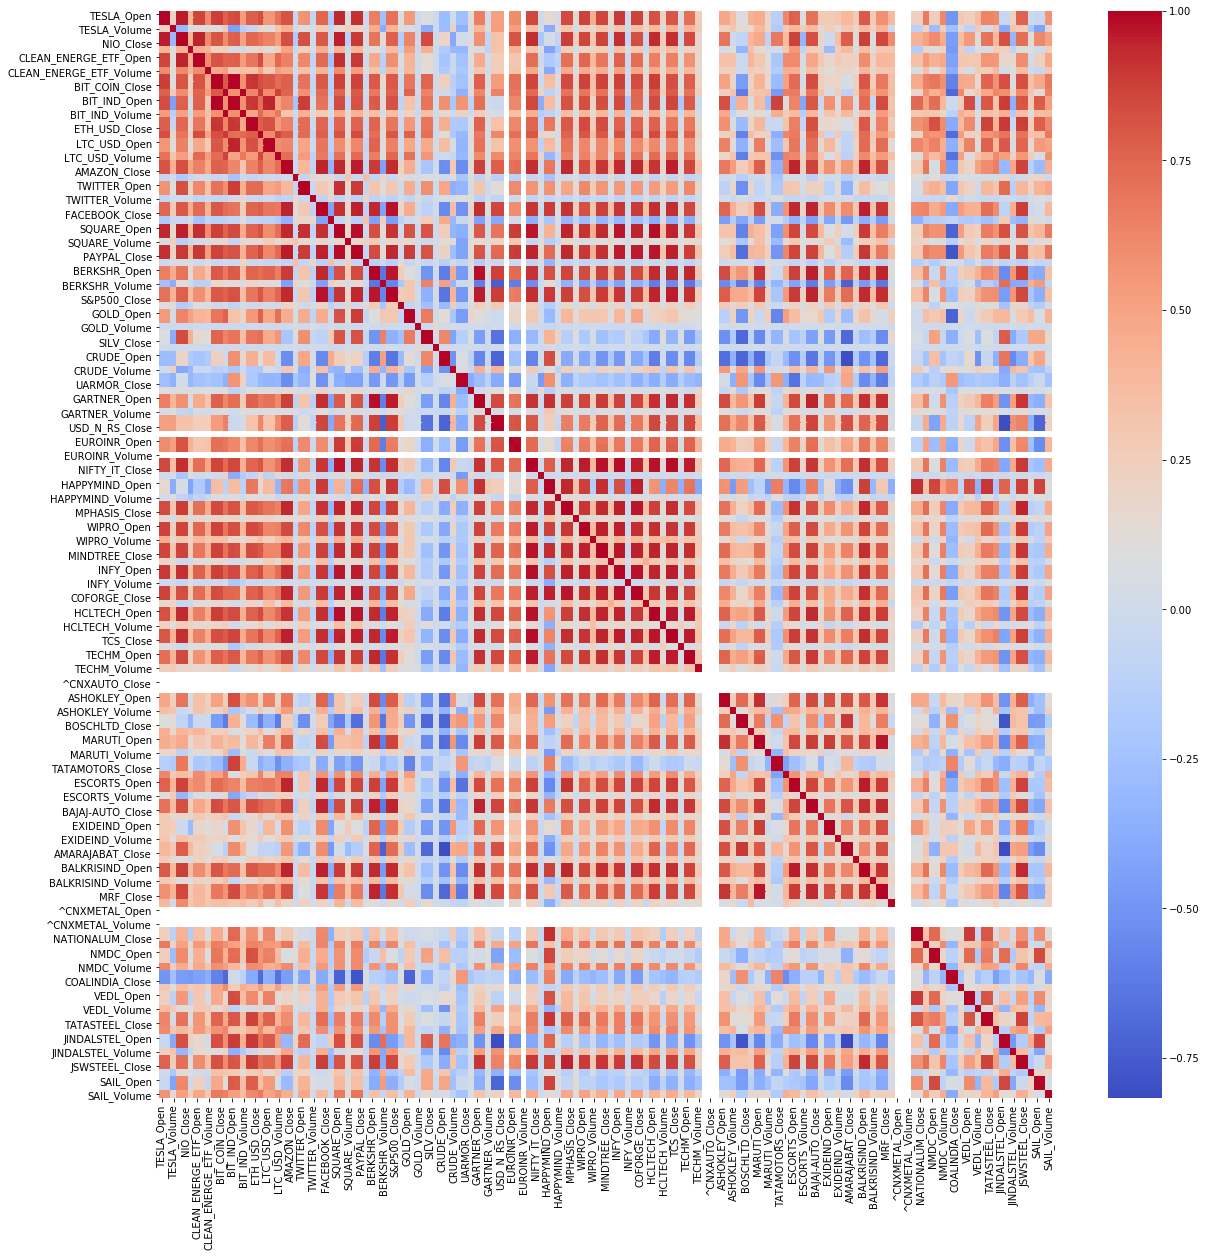

In [84]:
plt.figure(figsize=(20,20))
sns.heatmap(master_df.corr(),cmap='coolwarm')

### Plotting  higger correlations

In [85]:
corr_matrix = master_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corr_cols = [column for column in upper.columns if any(upper[column] > 0.95)]


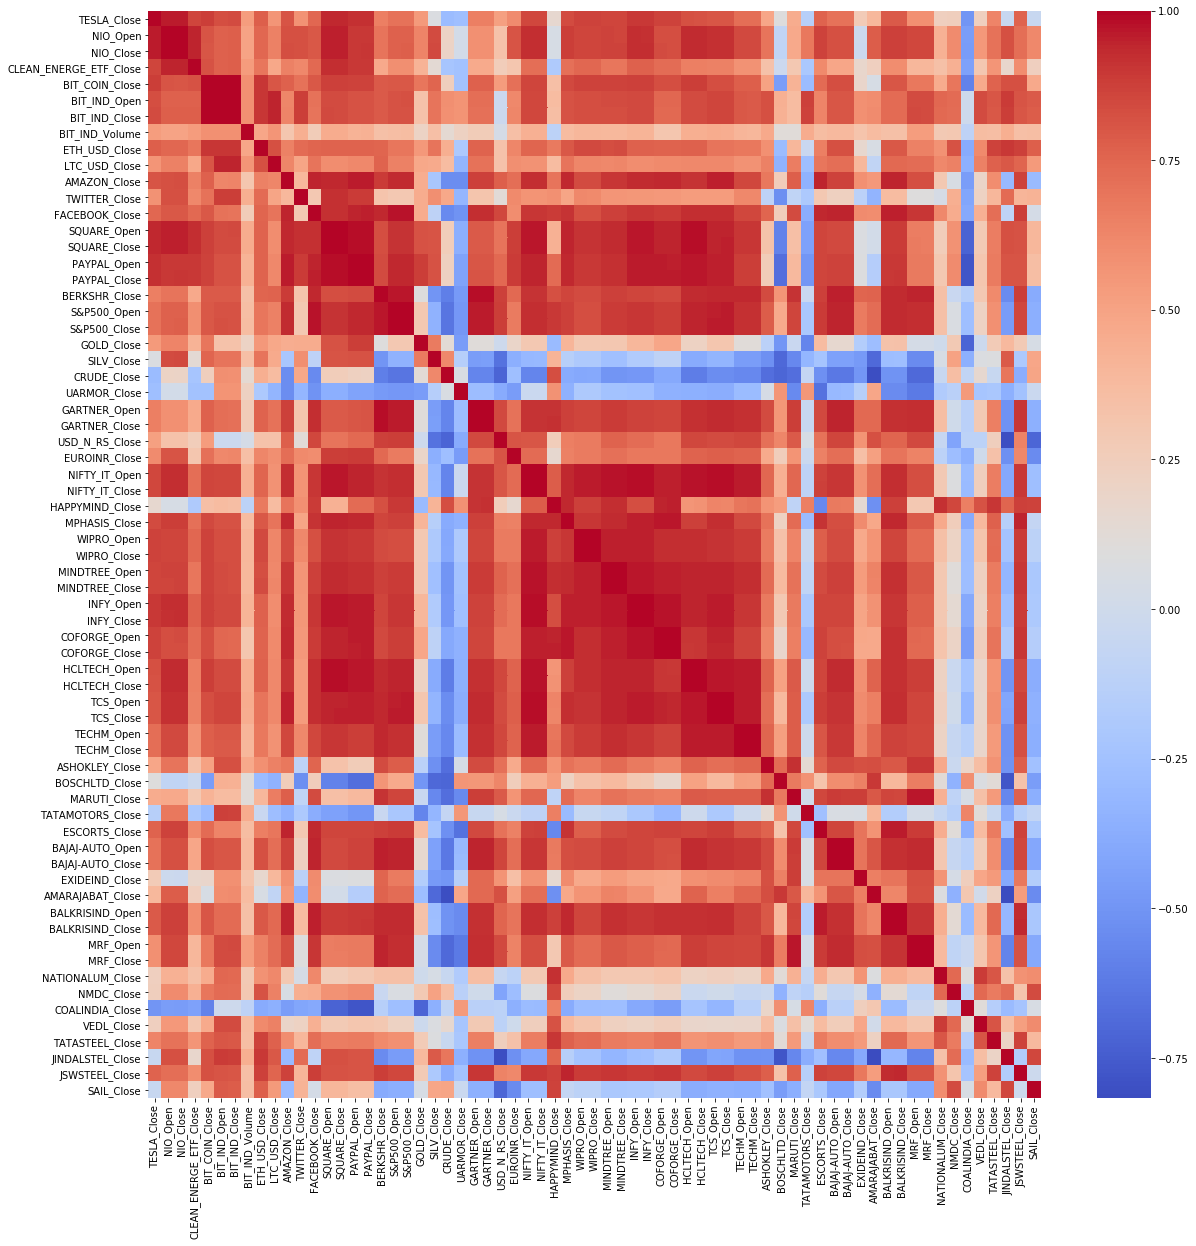

In [86]:
plt.figure(figsize=(20,20))
sns.heatmap(master_df[corr_cols].corr(),cmap='coolwarm')